# Predicting Heart Disease using Machine Learning 
This notebooks looks into various Python-based machine learning and data science libraries and we create a model to predict whether or not a person has heart disease based on their medical attributes . 

The approach we're goint to follow :
1. Problem Definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation 

## 1. Problem Definition 
In a statement ,
> Given clinical parameters about a patient , can we predict whether or not they have Heart-Disease ?

## 2. Data 
The original data came from the Cleaveland Data from the UCI Machine Learning Repository .
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
There is also a version of it available on Kaggle .
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation 

> if we can reach 95% accuracy in predicting whether a patient has Heart-Disease during the proof of project , then we'll persue the project .

## 4. Features 
This is where you'll get the information about each of the features in your data .

**Create a data dictionary**
1.  age-age in years
2.  sex-(1 = male; 0 = female)
3.  cp-chest pain type
     * 0 Typical angina: chest pain related to decrease in blood supply to the heart 
     * 1 Atypical angina: chest pain not related to the heart 
     * 2 Non-anginal pain:typically esophageal spasms (not related to the heart)
     * 3 Asymptomatic:chest pain not showing signs of disease
4.  trestbps-resting blood pressure (in mm Hg on admission to the hospital)(anything above 130-140 is typically a cause of concern) 
5.  chol-serum cholestoral in mg/dl
     * serum= LDL+HDL+.2 triglycerides
     * above 200 is a cause of concern 
6.  fbs-(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
     * '>126' mg/dl signals diabetes 
7.  restecg-resting electrocardiographic results
     * 0 Nothing to note 
     * 1 ST-T Wave abnormality
         * can range from mild symptoms to severe problems 
         * signals non-normal heart beat 
     * 2 Possible or Definite left ventricular hypertrophy 
         * Enlarged heart's main pumping system 
8.  thalach- maximum heart rate achieved
9.  exang- exercise induced angina (1 = yes; 0 = no)
10. oldpeak- ST depression induced by exercise relative to rest
     * looks at the stress of the heart induced by exercise with respect to rest 
11. slope- the slope of the peak exercise ST segment
     * 0 Unsloping: better heart rate with exercise (uncommon)
     * 1 Flatsloping: minimal change (typical healthy heart)
     * 2 Downsloping: signs of unhealthy heart 
12. ca- number of major vessels (0-3) colored by flourosopy
     * coloured vessels means the doctor can see the blood passing through 
     * the more blood movement the better (no clots )
13. thal-Thalium stress result  
     * 1,3- normal
     * 6-fixed defect: used to be defect but okay now  
     * 7-reversible defect: no proper blood movement when exercising 
14.  target- have heart disease or not (predicted attribute) 
     * 1 -yes 
     * 0 -no



## preparing the tools 

we're going to use pandas , numpy, matplotlib for data analysis and manipulation .


In [123]:
# import all the tools that we need 

# regular EDA (Exploratory data analysis) and plotting libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want our plots to appear inside the notebook 
%matplotlib inline


# models from scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# model-Evaluations 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


## Load data 

In [13]:
df=pd.read_csv("heart-disease.csv")
df.shape# (rows,columns)

(303, 14)

## Data exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on it.

1. what question(s) are we trying to solve ?
2. what kind of data do we have and how do we treat different types ?
3. what's missing from the data and how do we deal with it ?
4. where are the outliers and why should we care about them ?
5. how can we add, change , remove features to get more out of the data 


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#finding out how many of each class 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

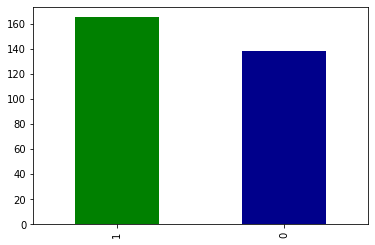

In [16]:
df["target"].value_counts().plot(kind="bar",color=["green","darkblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking if wehave missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart-disease frequency according to sex

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare sex with target
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


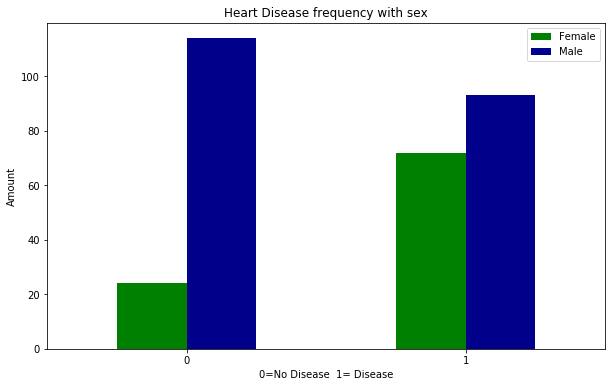

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["green","darkblue"])
plt.title("Heart Disease frequency with sex")
plt.xlabel("0=No Disease  1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


here we infer that women tend to have higher chances of having a heart disease with respect to a man from our dataset.

### Age vs Max Heart rate for heart disease

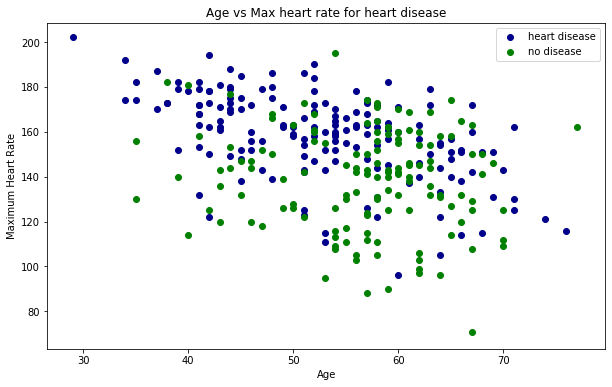

In [26]:
# create another figure 
plt.figure(figsize=(10,6))

#scatter with positive examples 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color=["darkblue"]);

plt.title("Age vs Max heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

# scatter with negative examples 
#plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color=["green"]);
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["heart disease", "no disease"])


Here we can understand that though the major cluster for heart disease patients lies in the age group of 40 to 60 the max heart rate for patients positive is slightly higer than patients tested negative . 
Also, the max heart rate shows slight downward incline as the patients age .

### Age vs Cholestrol levels for heart disease 

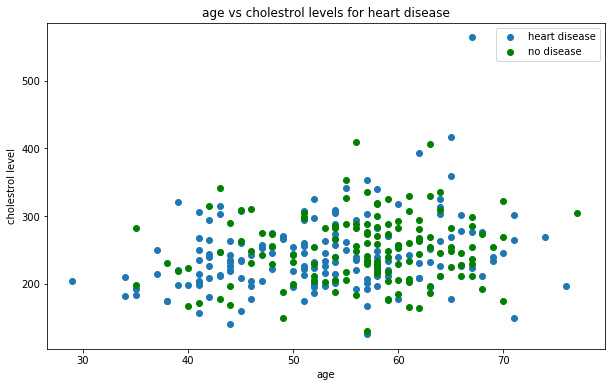

In [38]:
# creating a scatter plot for visualisation 
plt.figure(figsize=(10,6))

# creating for positive examples 
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1]);

plt.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            color='green');
plt.title("age vs cholestrol levels for heart disease")
plt.xlabel("age")
plt.ylabel("cholestrol level")
plt.legend(["heart disease","no disease"]);

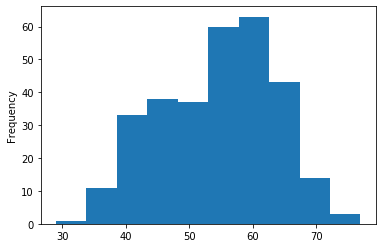

In [39]:
# distribution of age column with a histogram 

df["age"].plot(kind="hist");

### Heart disease frequency per chest pain type 

cp-chest pain type
* 0 Typical angina: chest pain related to decrease in blood supply to the heart
* 1 Atypical angina: chest pain not related to the heart
* 2 Non-anginal pain:typically esophageal spasms (not related to the heart)
* 3 Asymptomatic:chest pain not showing signs of disease

In [40]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


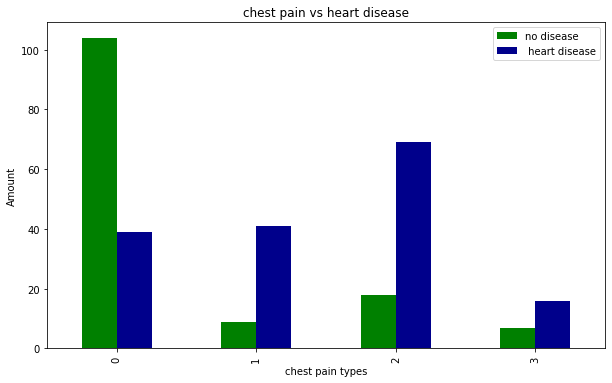

In [44]:
# make this more visual 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["green","darkblue"]);

# improving the communication with the graph 
plt.title("chest pain vs heart disease")
plt.xlabel("chest pain types")
plt.ylabel("Amount")
plt.legend(["no disease"," heart disease"]);


In [45]:
# make a correlation matrix()
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


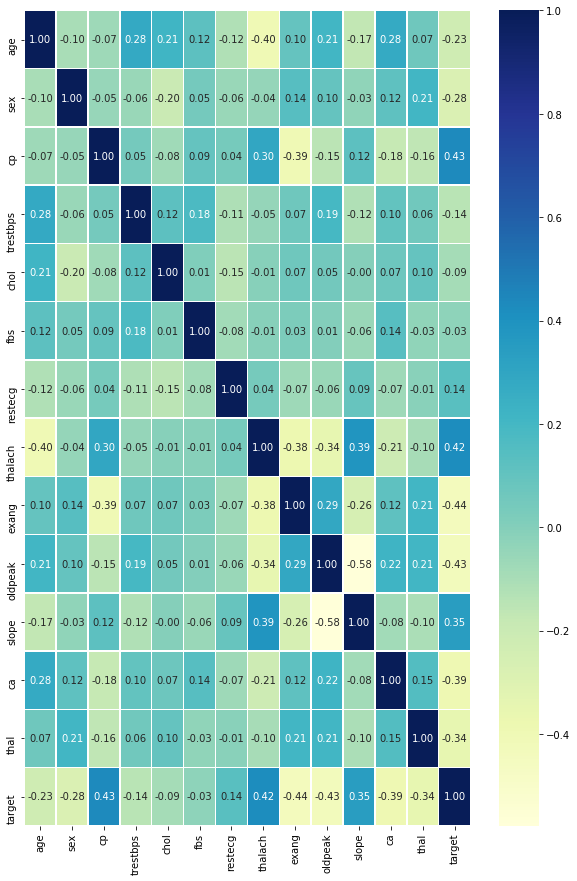

In [47]:
# making our correlation matrix a little pritter 
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,15))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")


## 5. Modelling 

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
# split data into x and y 
x=df.drop("target",axis=1)
y=df["target"]

# set up a random seed so that our results are reproduceable 
np.random.seed(42)

# split the data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [53]:
len(x_train),len(y_train)# checking the length of the training set

(242, 242)

Now that we've split our data we're going to train (finding patterns) our model on the train data set and then test our model(using the patterns learnt by the model) on the test data set. 
We're going to try 3 different types of models and compare each one of them .
1. Logistic Regression 
2. K-Nearest Neighbours Classifier 
3. Random Forest 

In [63]:
# put models in a dictionary 
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# create a function to fit and score the model 

def fit_and_score(models, x_train,x_test,y_train,y_test):
    """
    Trains the model on training data set and scores the model on 
    test data set.
    models: a dict of various scikit-learn machine learning models .
    x_train: training data set(no labels)
    x_test: test data set(no labels)
    y_train: training data set(labels)
    y_test:test data set(labels)
    
    """
    # set random seed 
    np.random.seed(42)
    
    #Make a dictionary to keep model scores 
    model_scores = {}
    
    #Loop through models
    
    for name , model in models.items():
        # Fit the model to the data 
        model.fit(x_train,y_train)
        # Evaluate the model and append its scores to model_scores{}
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores
    

In [64]:
model_scores=fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\prart\Desktop\Heart-Disease-Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

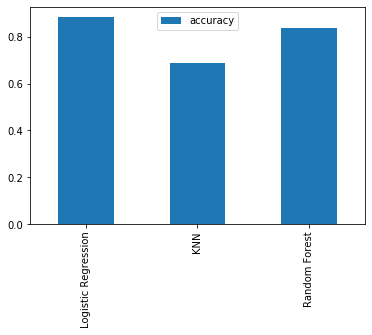

In [69]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar");

Now that we our baseline model and baseline predictions we'll try to improve our scores and visualisation by the following methods :
* Hyperparameter tuning 
* Feature importance 
* Confusion Matrix
* Coross-Validation
* Precision
* Recall 
* F1-score 
* Classification Report 
* ROC curve (Receiver Operating Characteristic)
* Area uner the curve (AUC)

### Hyperparameter Tuning 

In [70]:
# lets tune KNN
train_scores = []
test_scores = []


# create a list for different values of n-neighbors 

neighbors = range(1,21)

# set up KNN instance 

knn=KNeighborsClassifier()

# Loop through different n-neighbors 
for i in neighbors: 
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm 
    knn.fit(x_train,y_train)
    
    # update the train_scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #update test_scores list
    
    test_scores.append(knn.score(x_test,y_test))
    
    




In [71]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [72]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN accuracy is :75.41%


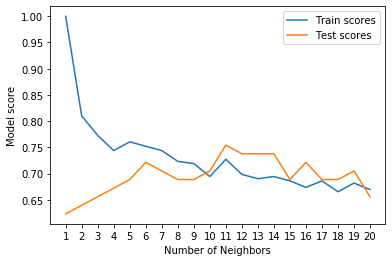

In [77]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"maximum KNN accuracy is :{max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune :
1. Logistic Regression()
2. RandomForest Classifier ()
.....with RandomizedSearchCV 

In [139]:
## create a hyperparameter grid for logistic regression 
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver":["liblinear"],
                "penalty":["l1","l2"]}

## Hyperparameter grid for RandomForest Classifier 
rf_grid = {"n_estimators": np.arange(10,100,50),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now that we have our Hyperparameter grids ready, we'll tune them using RandomizedSearchCV

In [140]:
# Tune Logistic Regression 
np.random.seed(42)

# setup random hyperparameter search for logistic regression 

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# fit random hyperparameter Search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [141]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [142]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now that we've tuned for Logestic/regression lets do the same for RandomForestClassifier()...

In [143]:

np.random.seed(50)
# setup random hyperparameter search for RandomForestClassifier  

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# fit random hyperparameter Search model for LogisticRegression
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [144]:
# find the best hyperparameters 
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [145]:
# evaluating our model 
rs_rf.score(x_test,y_test)

0.8524590163934426

In [146]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

Since our LogisticRegression Model provides the best result so far, we'll try and improve them using GridSearchCV 

In [158]:
# different parameters for our LogisticRegression Model 
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"],
                "penalty":["l1","l2"]}

# set up grid hyperparameter search for LogisticRegression 
gs_log_reg =GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
# fit grid hyperparameter search model 
gs_log_reg.fit (x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [159]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [160]:
#evaluate GridSearch LogisticRegression model:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [161]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned Machine Learning classifier, beyond accuracy 
* ROC Curve and AUC score
* Confusion Matrix
* Classification Report 
* Precision
* Recall
* F-1 Scores
... and we would use cross-validation method wherever possible . 
To make comparisons and evaluate our model we first need to make predictions .


In [148]:
# Make predictions with tuned model 
y_preds=gs_log_reg.predict(x_test)


In [149]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

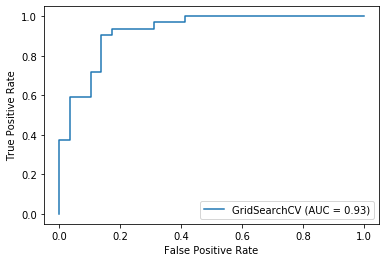

In [151]:
#plot ROC curve and evaluate AUC metric 
plot_roc_curve(gs_log_reg,x_test,y_test);

In [152]:
# confusion matrix
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

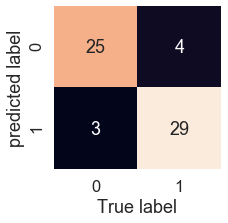

In [154]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test,y_preds):
    """
    plots a nice looking confusion matriz using seaborn's heatmap
    
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    
plot_conf_matrix(y_test,y_preds)

Now that we have a ROC curve ,AUC score and a confusion matrix. We're now going to create a classification report , find out our precision score, recall and f-1 scores 

In [156]:
print(classification_report(y_test,y_preds))# this is not cross-validated 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation

Will calculate accuracy, precision,recall and f-1 scores of our model suing cross-validation and to do so we'll be using `cross_val_score()`

In [163]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [164]:
# create a new classifier 
clf= LogisticRegression(C=0.20433597178569418,
                        penalty="l2",
                        solver="liblinear")

In [169]:
# cross-validated accuracy
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       scoring="accuracy")
cv_acc
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [172]:
# cross-validated precision
cv_precision=cross_val_score(clf,
                             x,
                             y,
                             scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [174]:
#cross-validated recall
cv_recall=cross_val_score(clf,
                          x,
                          y,
                          scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [176]:
# cross-validated f-1 score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

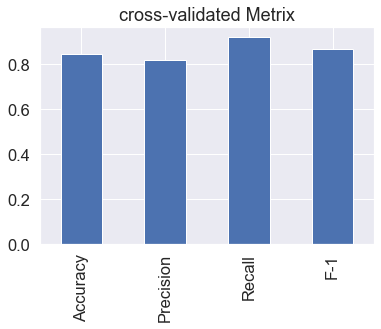

In [178]:
# visualize cross-validated metrics 
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall": cv_recall,
                         "F-1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="cross-validated Metrix",
                     legend=False);

### Feature Importance
Feature Importance is another way of asking which features in our data set contributed the most to the outcome and how did they do it .
feature importance is diffierent for each machine learning model .


One way to find feature importance is to search for (Model Name) feature Importance.

finding Feature Importance for LogisticRegression Model:

In [179]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [182]:
# fit an instance of LogisticRegression
clf= LogisticRegression(C=0.20433597178569418,
                        penalty="l2",
                        solver="liblinear")
clf.fit(x_train,y_train);

In [183]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [184]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [185]:
# match coef's of features to columns 
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

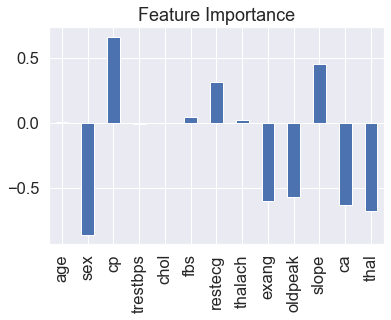

In [186]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);